# Import thư viện

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Set matplotlib figure size
plt.rcParams['figure.figsize'] = (20, 4)

# Đọc dữ liệu

In [50]:
# Power dataframe
p_df = pd.read_csv('./data/W.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)

# Power factor dataframe
pf_df = pd.read_csv('./data/cosphi.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)

light    : chiếu sáng  
socket   : ổ cắm phòng khách + bếp + ngủ  
heater   : bình nóng lạnh  
aircond1 : điều hoà 1 & 2  
aircond2 : điều hoà 3  
aircond3 : điều hoà phòng khách  
indcooker: bếp từ  

### Bảng công suất tiêu thụ

In [51]:
p_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,216.0,0,244.0,0.0,631.0,1.0
1,2020-07-15 00:01:00,0.0,210.0,0,286.0,0.0,631.0,3.5
2,2020-07-15 00:02:00,0.0,206.0,0,314.0,0.0,633.0,6.0
3,2020-07-15 00:03:00,0.0,206.0,0,254.0,0.0,632.0,3.5
4,2020-07-15 00:04:00,0.0,160.0,0,274.0,0.0,629.0,1.0
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,236.0,0,183.0,0.0,0.0,1.0
31676,2020-08-05 23:56:00,0.0,238.0,0,174.0,0.0,0.0,1.0
31677,2020-08-05 23:57:00,0.0,243.0,0,199.0,0.0,0.0,1.0
31678,2020-08-05 23:58:00,0.0,241.0,0,229.0,0.0,0.0,1.0


### Bảng hệ số công suất

In [52]:
pf_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,0.975,0.0,0.700,0.0,0.960,0.02
1,2020-07-15 00:01:00,0.0,0.955,0.0,0.815,0.0,0.960,0.06
2,2020-07-15 00:02:00,0.0,0.940,0.0,0.895,0.0,0.965,0.10
3,2020-07-15 00:03:00,0.0,0.940,0.0,0.720,0.0,0.955,0.06
4,2020-07-15 00:04:00,0.0,0.865,0.0,0.775,0.0,0.955,0.02
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,0.975,0.0,0.675,0.0,0.000,0.02
31676,2020-08-05 23:56:00,0.0,0.980,0.0,0.645,0.0,0.000,0.02
31677,2020-08-05 23:57:00,0.0,0.985,0.0,0.740,0.0,0.000,0.02
31678,2020-08-05 23:58:00,0.0,0.970,0.0,0.850,0.0,0.000,0.02


# Tính Q (Công suất phản kháng)

Tính bảng Q dựa trên bảng P và bảng cosphi  
Dựa trên công thức Q = P * tan(arccos(cosphi))

In [53]:
# Q dataframe
q_df = pd.DataFrame()
q_df['time'] = p_df['time']
column_names = ['light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker']

for col_name in column_names:
    q_df[col_name] = np.tan(np.arccos(pf_df[col_name])) * p_df[col_name]
    
q_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,49.226923,0.0,248.929791,0.0,184.041667,49.989999
1,2020-07-15 00:01:00,0.0,65.222218,0.0,203.344581,0.0,184.041667,58.228239
2,2020-07-15 00:02:00,0.0,74.768016,0.0,156.496947,0.0,172.025051,59.699246
3,2020-07-15 00:03:00,0.0,74.768016,0.0,244.818628,0.0,196.287817,58.228239
4,2020-07-15 00:04:00,0.0,92.813292,0.0,223.428875,0.0,195.356071,49.989999
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,53.784971,0.0,200.030584,0.0,0.000000,49.989999
31676,2020-08-05 23:56:00,0.0,48.327961,0.0,206.151577,0.0,0.000000,49.989999
31677,2020-08-05 23:57:00,0.0,42.569243,0.0,180.876712,0.0,0.000000,49.989999
31678,2020-08-05 23:58:00,0.0,60.400293,0.0,141.921453,0.0,0.000000,49.989999


# Chọn thiết bị

In [54]:
# select_device = ['heater', 'indcooker']
# select_device = ['heater', 'indcooker', 'aircond1']
# select_device = ['heater', 'indcooker', 'aircond1', 'aircond2', 'aircond3']
select_device = ['heater', 'indcooker', 'aircond1', 'aircond2', 'aircond3', 'socket', 'light']


### Vẽ đồ thị của từng thiết bị

Đồ thị chỉ vẽ P  
uncomment dòng `axs[i].plot(q_df[col])` để vẽ cả đồ thị Q

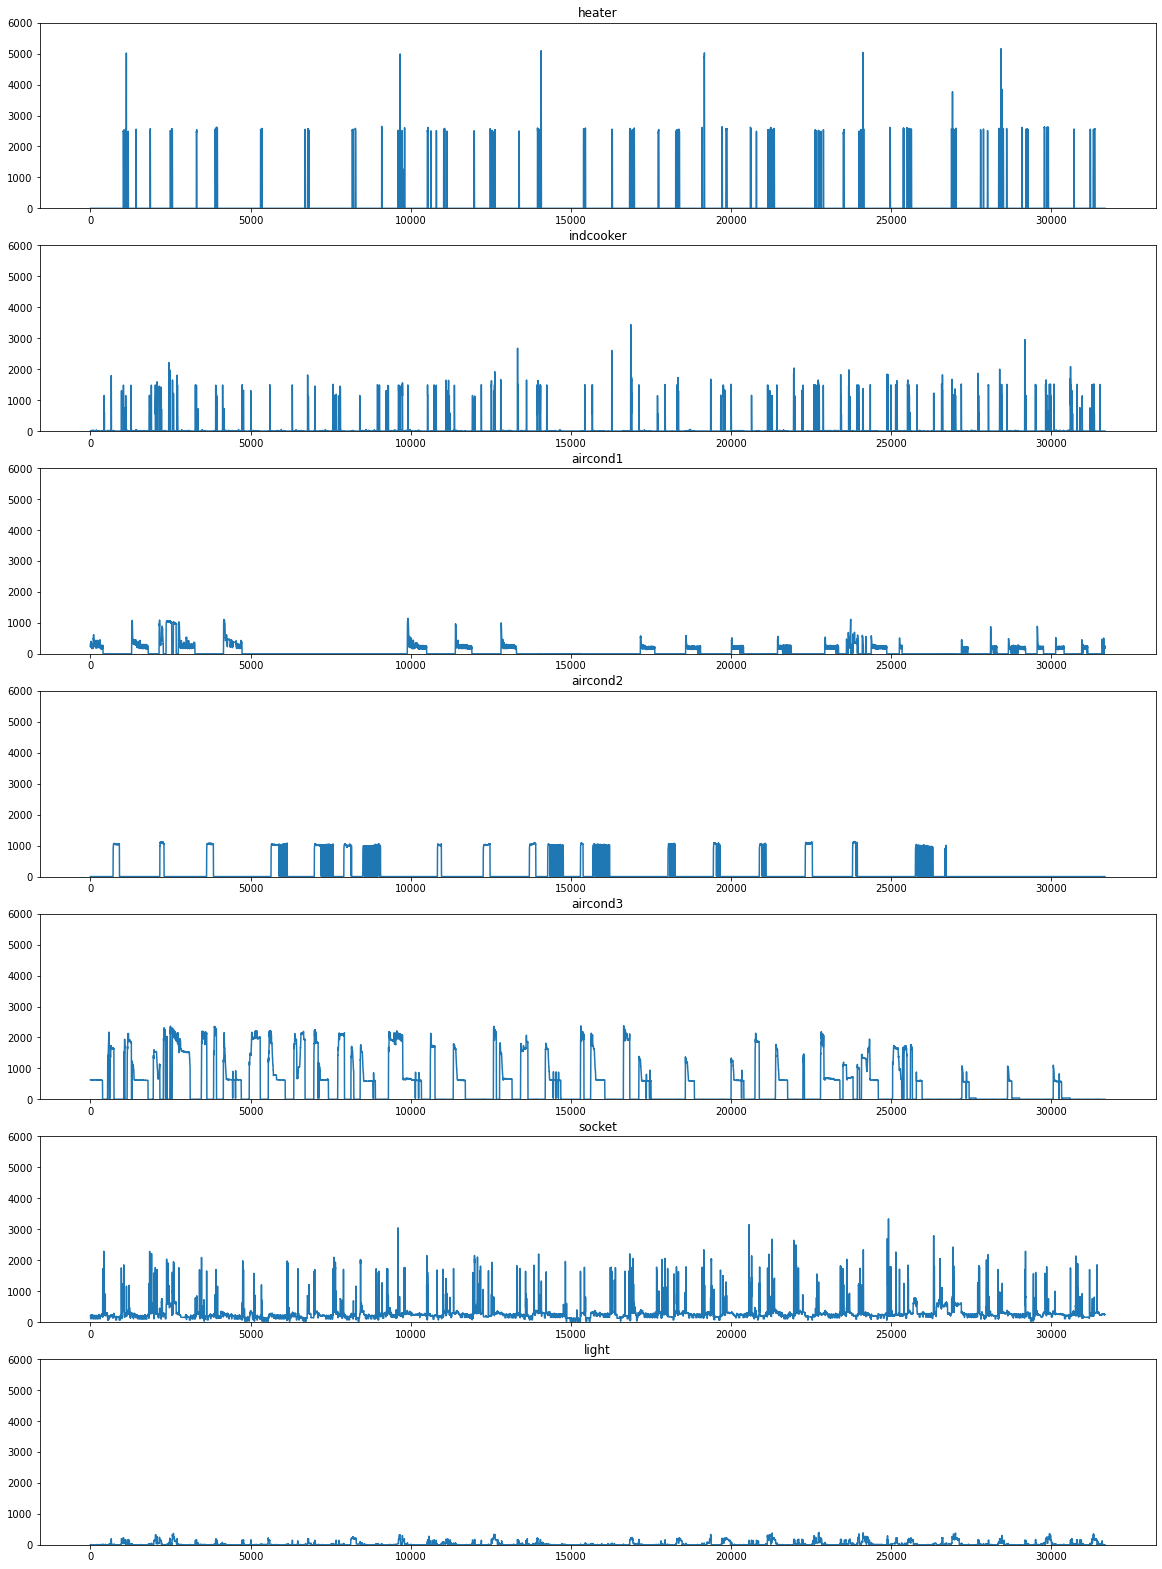

In [55]:
fig, axs = plt.subplots(len(select_device))
fig.set_figheight(4 * len(select_device))
for i, col in enumerate(select_device):
    axs[i].plot(p_df[col])
#     axs[i].plot(q_df[col])
    axs[i].set_title(col)
    axs[i].set_ylim([0,6000])

# Tính tổng P, Q

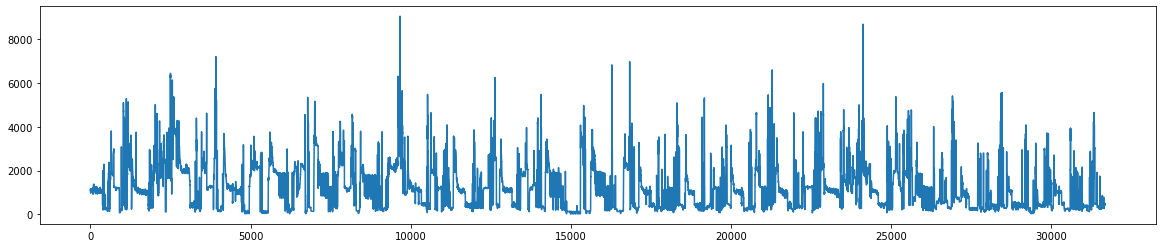

In [56]:
p_sum = p_df[select_device].sum(axis=1).to_numpy()
q_sum = q_df[select_device].sum(axis=1).to_numpy()
plt.plot(p_sum)

# Lấy các điểm có delta P và delta Q ở ngưỡng nhất định

Chỉ lấy các điểm có deltaP và deltaQ lớn hơn `min_delta_p`

`threshold` là ngưỡng công suất xác định thiết bị đang ở trạng thái bật hay tắt.

- Nhãn = 0 tương ứng với thiết bị 0 bật  
- Nhãn = 1 tương ứng với thiết bị 0 tắt  
- Nhãn = 2 tương ứng với thiết bị 1 bật  
- Nhãn = 3 tương ứng với thiết bị 1 tắt  
- ...   
- Nhãn `2 * i` tương ứng với thiết bị `i` bật  
- Nhãn `2 * i + 1` tương ứng với thiết bị `i` tắt

In [57]:
data = []
label = []
min_delta_p = 20
threshold = 50

# For each time t
for t in range(len(p_sum) - 1):
    
    # Calculate delta P and delta Q
    delta_p = p_sum[t+1] - p_sum[t]
    delta_q = q_sum[t+1] - q_sum[t]
    
    # Only consider if |delta P| > min_delta_p:
    if abs(delta_p) > min_delta_p:
        
        # For each device
        for i in range(len(select_device)):
            
            # Check if the device has just turned on or off, then add to dataset
            if p_df[select_device[i]].iloc[t] < threshold and p_df[select_device[i]].iloc[t+1] >= threshold:
                data.append([delta_p, delta_q])
                label.append(2*i)
                break
            elif p_df[select_device[i]].iloc[t] >= threshold and p_df[select_device[i]].iloc[t+1] < threshold:
                data.append([delta_p, delta_q])
                label.append(2*i+1)
                break

Tổng số điểm dữ liệu

In [58]:
print(len(data))
print(len(label))

1798
1798


### Phân bố nhãn lớp

Có n thiết bị tương ứng với 2n nhãn lớp

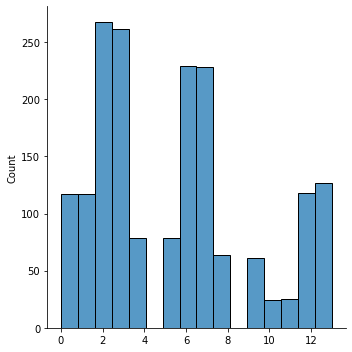

In [59]:
import seaborn as sns
sns.displot(label)

### Đưa nhãn lớp về dạng one-hot vector

- Nhãn 0 tương ứng với [1, 0, 0, .. , 0]
- Nhãn 1 tương ứng với [0, 1, 0, .. , 0]
- ... 
- Nhãn 2n - 1 tương ứng với [0, 0, 0, .., 1]

Độ dài vector = 2n (n là số thiết bị)

In [60]:
X = data

def one_hot(y):
    ret = [0 for i in range(len(select_device) * 2)]
    ret[y] = 1
    return ret
    
y = list(map(one_hot, label))

In [61]:
data_df = pd.DataFrame(data=X, columns=['delta P', 'delta Q'])
data_df['label'] = y
data_df

,delta P,delta Q,label
0,-206.5,-536.042031,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,-147.0,-29.057986,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,566.5,884.529521,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,-601.0,-836.596650,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,561.0,823.507146,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...
1793,51.0,127.181935,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1794,-66.5,-97.733020,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1795,220.5,298.980108,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1796,-227.5,-91.201697,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


# Chia tập train, test

Tỷ lệ chia 70-30, lấy theo thứ tự, không xáo trộn (để dễ dàng so sánh kết quả với các giải thuật hoặc mô hình khác)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Training

In [63]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', 
                    alpha=1e-5, 
                    hidden_layer_sizes=30, 
                    random_state=1, 
                    max_iter=1000, 
                    verbose=True, 
                    learning_rate='adaptive',
                    n_iter_no_change=20)
clf.fit(X_train, y_train)


Iteration 1, loss = 259.12560352
Iteration 2, loss = 241.59569952
Iteration 3, loss = 216.49828642
Iteration 4, loss = 180.62399108
Iteration 5, loss = 150.58968609
Iteration 6, loss = 135.13366922
Iteration 7, loss = 120.07823875
Iteration 8, loss = 105.30615476
Iteration 9, loss = 91.08848246
Iteration 10, loss = 81.15588973
Iteration 11, loss = 65.04133282
Iteration 12, loss = 56.00268864
Iteration 13, loss = 47.76244222
Iteration 14, loss = 40.32834755
Iteration 15, loss = 36.26240660
Iteration 16, loss = 30.23547749
Iteration 17, loss = 24.45286238
Iteration 18, loss = 20.00923397
Iteration 19, loss = 17.94877893
Iteration 20, loss = 16.41781418
Iteration 21, loss = 15.08118481
Iteration 22, loss = 13.57667948
Iteration 23, loss = 12.50463900
Iteration 24, loss = 11.64774858
Iteration 25, loss = 10.88911038
Iteration 26, loss = 10.36732118
Iteration 27, loss = 10.03771900
Iteration 28, loss = 9.72484979
Iteration 29, loss = 9.38156193
Iteration 30, loss = 9.07009566
Iteration 31, 

Iteration 291, loss = 2.39216395
Iteration 292, loss = 2.38945252
Iteration 293, loss = 2.36836081
Iteration 294, loss = 2.37168166
Iteration 295, loss = 2.35112001
Iteration 296, loss = 2.36772406
Iteration 297, loss = 2.38737388
Iteration 298, loss = 2.36840185
Iteration 299, loss = 2.37716810
Iteration 300, loss = 2.34366179
Iteration 301, loss = 2.35790703
Iteration 302, loss = 2.42001587
Iteration 303, loss = 2.49580293
Iteration 304, loss = 2.48153401
Iteration 305, loss = 2.43421399
Iteration 306, loss = 2.42757677
Iteration 307, loss = 2.38034650
Iteration 308, loss = 2.31515229
Iteration 309, loss = 2.34166394
Iteration 310, loss = 2.36654311
Iteration 311, loss = 2.35235028
Iteration 312, loss = 2.34721555
Iteration 313, loss = 2.32575481
Iteration 314, loss = 2.32283592
Iteration 315, loss = 2.32282271
Iteration 316, loss = 2.41116711
Iteration 317, loss = 2.38334896
Iteration 318, loss = 2.32316135
Iteration 319, loss = 2.36991268
Iteration 320, loss = 2.38093517
Iteration 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=30, learning_rate='adaptive',
              max_iter=1000, n_iter_no_change=20, random_state=1, verbose=True)

# Test

In [64]:
print("accuracy=", clf.score(X_test, y_test))

accuracy= 0.4740740740740741
